## 2.0 Setting up the work environment

In [15]:
# Clear the env
rm(list = ls())
# List of packages
package_list <- c("tidyverse", "lubridate", "readxl", "tidyr", "Hmisc", "skimr",
                  "ggcorrplot","caret", "caretEnsemble", "PerformanceAnalytics",
                  "kableExtra", "kernlab", "randomForest", "xgboost")

# Load/Install packages
suppressMessages(pacman::p_load(package_list, character.only = TRUE))



In [17]:
# Loading the data.
# Choosing the file interactively and saving the file location in the variable f
f <- file.choose()

In [18]:
# Loading the data into the notebook
# Import the datasets
ads_tbl <- suppressWarnings(suppressMessages(read_csv(f))) %>% as_tibble()

In [19]:
# Previewing the top of the dataset
head(ads_tbl)

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


In [12]:
## Exploring the variables
ads_tbl %>% glimpse()

Observations: 1,000
Variables: 10
$ `Daily Time Spent on Site` <dbl> 68.95, 80.23, 69.47, 74.15, 68.37, 59.99...
$ Age                        <dbl> 35, 31, 26, 29, 35, 23, 33, 48, 30, 20, ...
$ `Area Income`              <dbl> 61833.90, 68441.85, 59785.94, 54806.18, ...
$ `Daily Internet Usage`     <dbl> 256.09, 193.77, 236.50, 245.89, 225.58, ...
$ `Ad Topic Line`            <chr> "Cloned 5thgeneration orchestration", "M...
$ City                       <chr> "Wrightburgh", "West Jodi", "Davidton", ...
$ Male                       <dbl> 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0...
$ Country                    <chr> "Tunisia", "Nauru", "San Marino", "Italy...
$ Timestamp                  <dttm> 2016-03-27 00:53:11, 2016-04-04 01:39:0...
$ `Clicked on Ad`            <dbl> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0...


> The data consists of 10 variables and 1000 observations. The numeric variables have an appropriate data types and the string variable also haveappropriate data types too.

In [13]:
# Detailed statistics of the data.
describe(ads_tbl)

ads_tbl 

 10  Variables      1000  Observations
--------------------------------------------------------------------------------
Daily Time Spent on Site 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    1000        0      900        1       65    18.11    37.58    41.34 
     .25      .50      .75      .90      .95 
   51.36    68.22    78.55    83.89    86.20 

lowest : 32.60 32.84 32.91 32.99 33.21, highest: 90.97 91.10 91.15 91.37 91.43
--------------------------------------------------------------------------------
Age 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    1000        0       43    0.999    36.01    9.943    23.95    26.00 
     .25      .50      .75      .90      .95 
   29.00    35.00    42.00    49.00    52.00 

lowest : 19 20 21 22 23, highest: 57 58 59 60 61
--------------------------------------------------------------------------------
Area Income 
       n  missing distinct     Info     Mean      Gmd     

In [21]:
names(ads_tbl) <- gsub(" ", ".", names(ads_tbl))
names(ads_tbl)

[1] "Daily.Time.Spent.on.Site" "Age"                     
 [3] "Area.Income"              "Daily.Internet.Usage"    
 [5] "Ad.Topic.Line"            "City"                    
 [7] "Male"                     "Country"                 
 [9] "Timestamp"                "Clicked.on.Ad"

In [ ]:
summarise_at(group_by(ads_tbl, ))

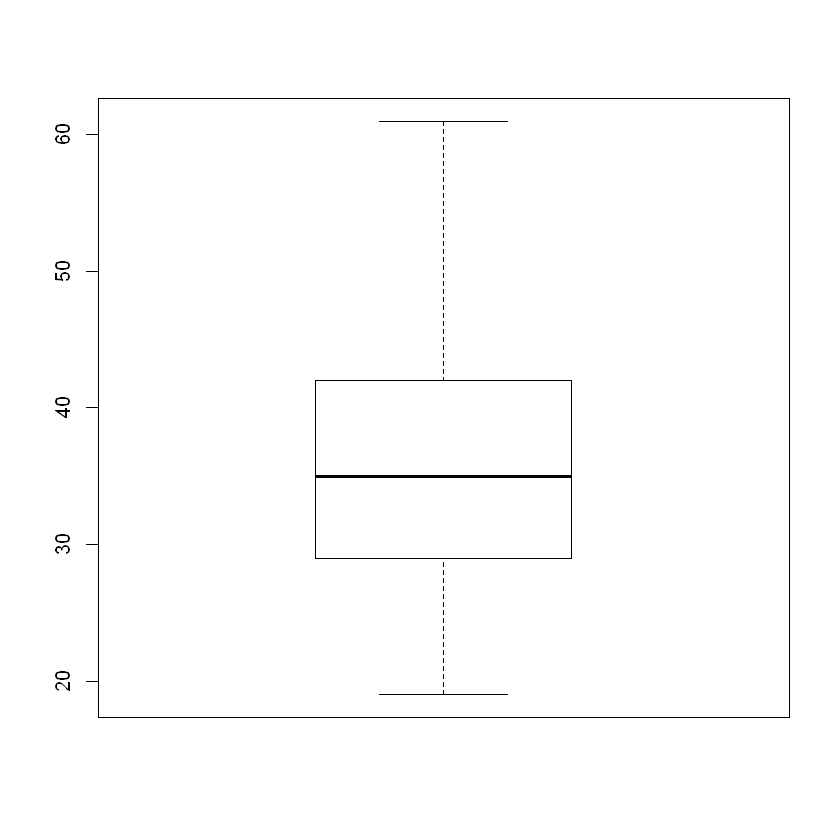

In [22]:
#Checking for outliers
boxplot(ads$Age)

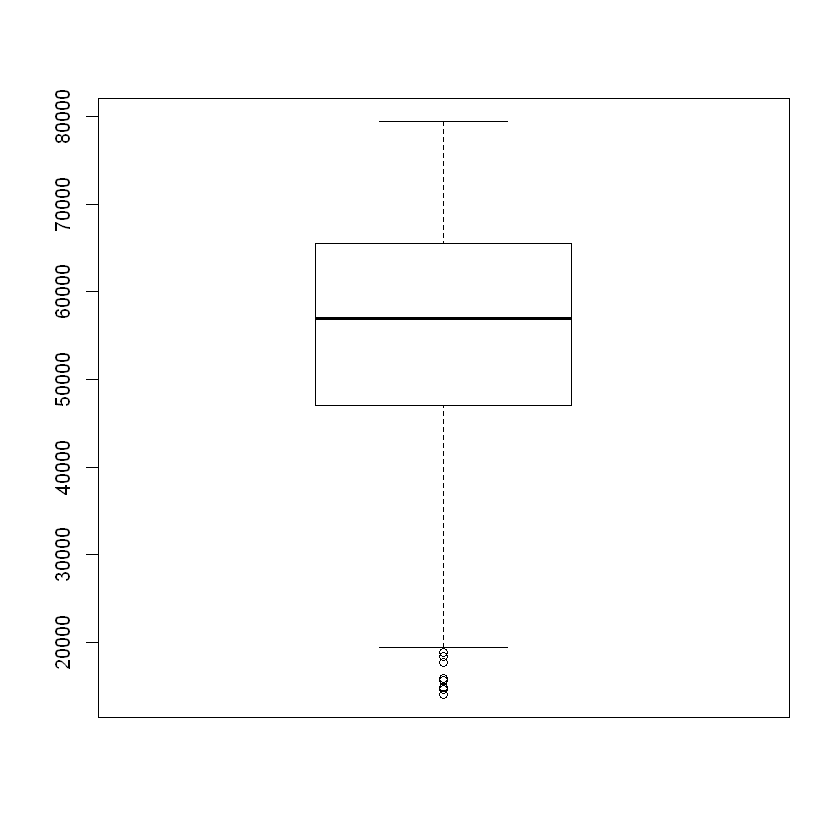

In [23]:
boxplot(ads$Area.Income)

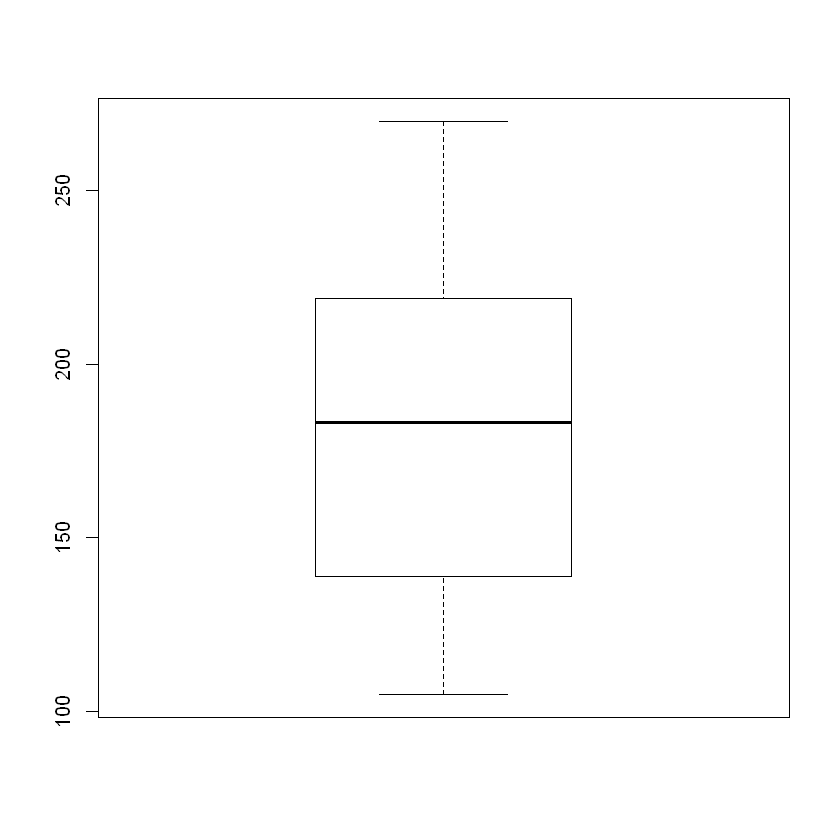

In [24]:
boxplot(ads$Daily.Internet.Usage)

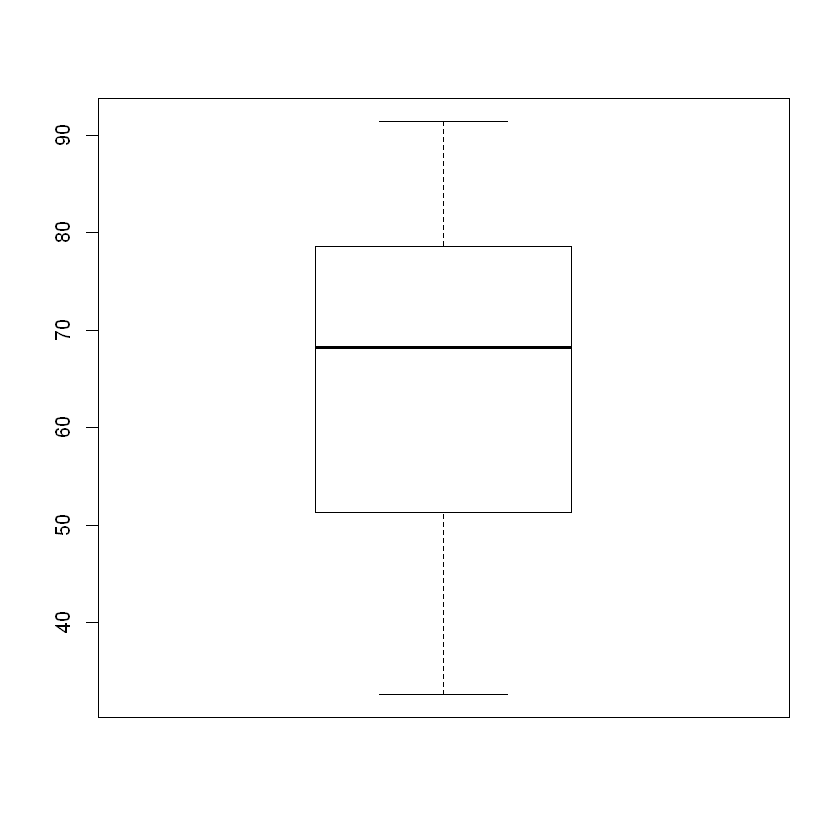

In [25]:
boxplot(ads$Daily.Time.Spent.on.Site)

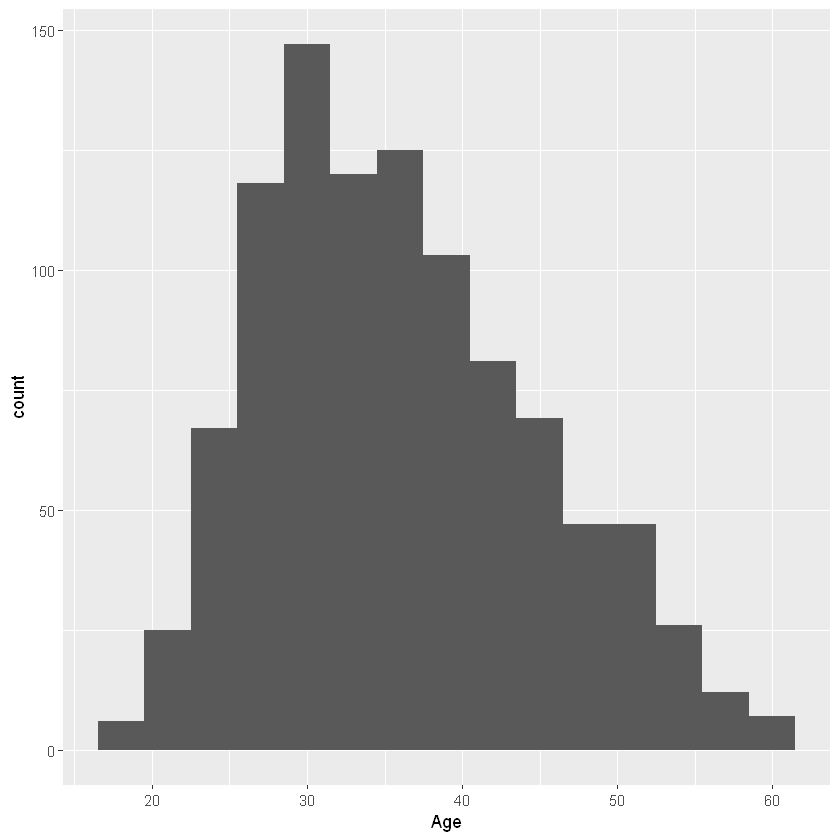

In [30]:
# Histogram of Age column to show the distribution of respondents.
ggplot(data = ads) +
  geom_histogram(mapping = aes(x = Age), bins = 15)

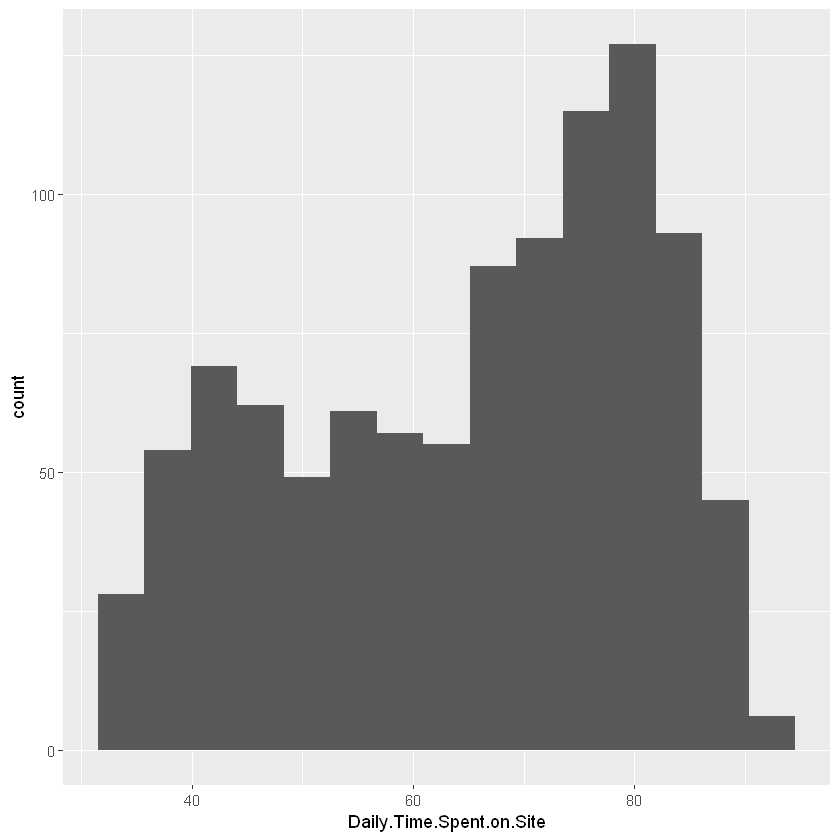

In [32]:
ggplot(data = ads) +
  geom_histogram(mapping = aes(x = Daily.Time.Spent.on.Site), bins = 15)

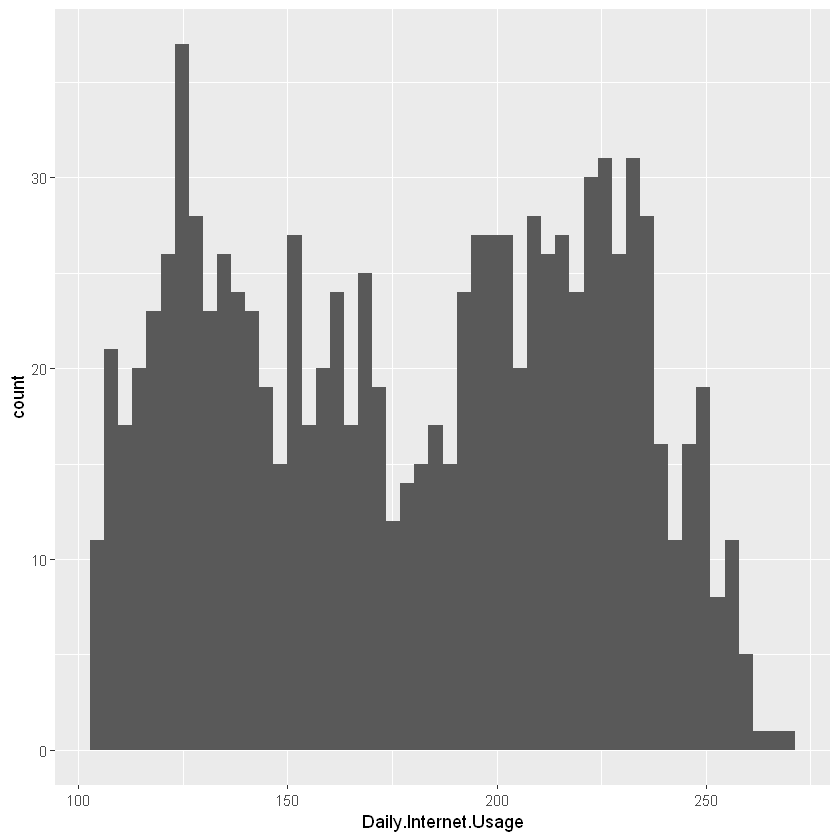

In [34]:
ggplot(data=ads) +
    geom_histogram(mapping = aes(x = Daily.Internet.Usage), bins = 50)

In [53]:
head(ads)

Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


In [ ]:
# Grouped Bar Plot
counts <- table(mtcars$vs, mtcars$gear)
barplot(counts, main="Car Distribution by Gears and VS",
  xlab="Number of Gears", col=c("darkblue","red"),
  legend = rownames(counts), beside=TRUE)

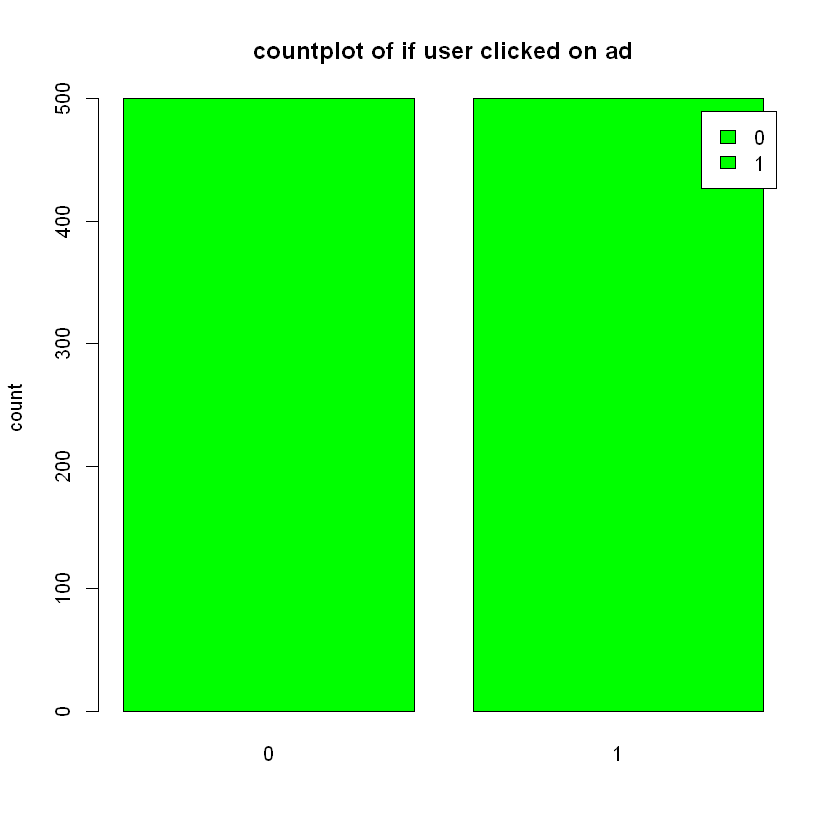

In [64]:
 counts = table(ads$Clicked.on.Ad)
barplot(counts, main="countplot of if user clicked on ad",
       ylab="count", col=c("green"),
       legend=rownames(counts), beside=TRUE)

> From the countplot, the data is balanced as we have equal number of data points of people who clicked and didn't click on ads.

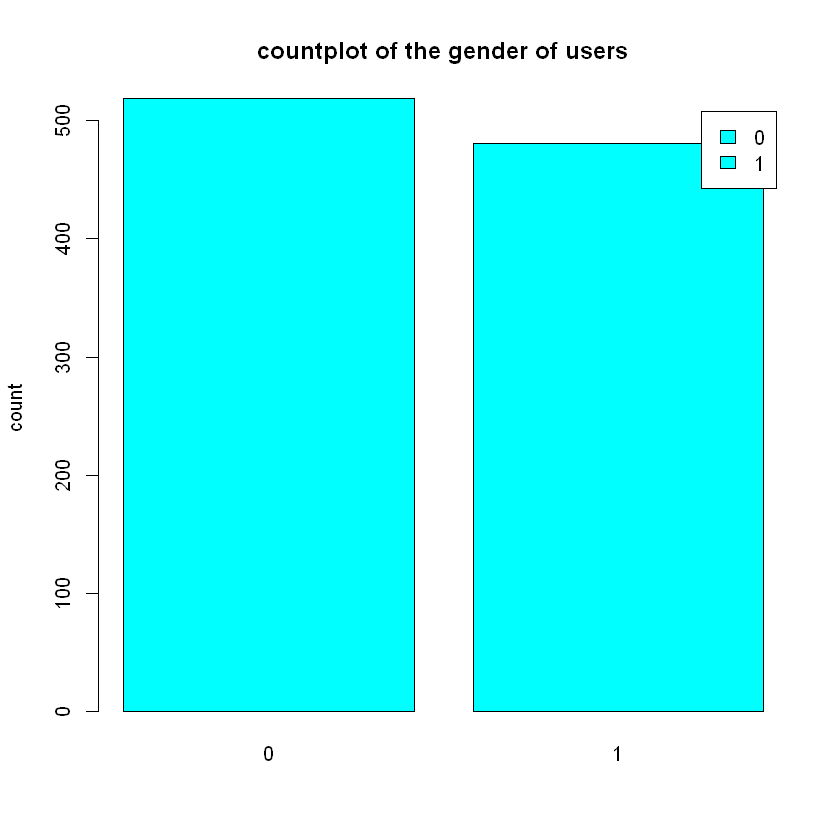

In [65]:
counts = table(ads$Male)
barplot(counts, main="countplot of the gender of users",
       ylab="count", col=c("cyan"),
       legend=rownames(counts), beside=TRUE)

> From the countplot, we can conclude that the number of users that were female were slightly more than those that were male. 

In [67]:
head(ads)

Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


In [74]:
# Scatterplot Matrices from the car Package
library(car)
scatterplot.matrix(Daily.Internet.Usage, data=ads)

ERROR: Error in scatterplot.matrix(Daily.Internet.Usage, data = ads): could not find function "scatterplot.matrix"


In [71]:
install.packages("car")

also installing the dependencies 'zip', 'SparseM', 'MatrixModels', 'sp', 'openxlsx', 'minqa', 'nloptr', 'RcppEigen', 'carData', 'abind', 'pbkrtest', 'quantreg', 'maptools', 'rio', 'lme4'



package 'zip' successfully unpacked and MD5 sums checked
package 'SparseM' successfully unpacked and MD5 sums checked
package 'MatrixModels' successfully unpacked and MD5 sums checked
package 'sp' successfully unpacked and MD5 sums checked
package 'openxlsx' successfully unpacked and MD5 sums checked
package 'minqa' successfully unpacked and MD5 sums checked
package 'nloptr' successfully unpacked and MD5 sums checked
package 'RcppEigen' successfully unpacked and MD5 sums checked
package 'carData' successfully unpacked and MD5 sums checked
package 'abind' successfully unpacked and MD5 sums checked
package 'pbkrtest' successfully unpacked and MD5 sums checked
package 'quantreg' successfully unpacked and MD5 sums checked
package 'maptools' successfully unpacked and MD5 sums checked
package 'rio' successfully unpacked and MD5 sums checked
package 'lme4' successfully unpacked and MD5 sums checked
package 'car' successfully unpacked and MD5 sums checked

The downloaded binary packages are in

In [77]:
install.packages("xgboost")

package 'xgboost' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\USER\AppData\Local\Temp\RtmpCMshFn\downloaded_packages


In [10]:
# dropping the unnecessary columns that will not be used for analysis.
ads = ads[-5]
ads = ads[-5]
ads = ads[-7]
ads = ads[-6]

In [11]:
head(ads)

Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Male,Clicked.on.Ad
68.95,35,61833.90,256.09,0,0
80.23,31,68441.85,193.77,1,0
69.47,26,59785.94,236.50,0,0
74.15,29,54806.18,245.89,1,0
68.37,35,73889.99,225.58,0,0
59.99,23,59761.56,226.74,1,0


In [12]:

label = ads[6]


In [20]:
#
a = nrow(ads)
a1 = floor(a*(0.7))
a2 = a-a1

set.seed(100)
ind = sample(1:a, a1, replace = FALSE)
train = ads[ind,]
test = ads[-ind,]
x_train = train %>% select(-c(Clicked.on.Ad))%>%as.matrix()
y_train = train$Clicked.on.Ad %>% as.factor()

model = xgboost(data=data.matrix(x_train[, -1]), label=y_train, nround=30)
summary(model)

[1]	train-rmse:0.795184 
[2]	train-rmse:0.574747 
[3]	train-rmse:0.423427 
[4]	train-rmse:0.321728 
[5]	train-rmse:0.254058 
[6]	train-rmse:0.205232 
[7]	train-rmse:0.168215 
[8]	train-rmse:0.146056 
[9]	train-rmse:0.129732 
[10]	train-rmse:0.116455 
[11]	train-rmse:0.109553 
[12]	train-rmse:0.102805 
[13]	train-rmse:0.099282 
[14]	train-rmse:0.093792 
[15]	train-rmse:0.089977 
[16]	train-rmse:0.088631 
[17]	train-rmse:0.087545 
[18]	train-rmse:0.085177 
[19]	train-rmse:0.080045 
[20]	train-rmse:0.075332 
[21]	train-rmse:0.073937 
[22]	train-rmse:0.072551 
[23]	train-rmse:0.070118 
[24]	train-rmse:0.066286 
[25]	train-rmse:0.065972 
[26]	train-rmse:0.063454 
[27]	train-rmse:0.060615 
[28]	train-rmse:0.057430 
[29]	train-rmse:0.055456 
[30]	train-rmse:0.054608 


               Length Class              Mode       
handle             1  xgb.Booster.handle externalptr
raw            62093  -none-             raw        
niter              1  -none-             numeric    
evaluation_log     2  data.table         list       
call              13  -none-             call       
params             1  -none-             list       
callbacks          2  -none-             list       
feature_names      4  -none-             character  
nfeatures          1  -none-             numeric    

In [21]:
x_test = test %>% select(-c(Clicked.on.Ad))
x_test = data.matrix(x_test[, -1])
y_test = test$Clicked.on.Ad %>% as.factor()
y_pred = predict(model, x_test)
gg1=floor(y_pred+0.5)
ttt = table(y_test, gg1)
ttt

      gg1
y_test   1   2
     0 136   8
     1  18 138

In [116]:
install.packages("ROSE")

package 'ROSE' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\USER\AppData\Local\Temp\RtmpCMshFn\downloaded_packages


In [122]:
xgb.plot.tree(f model = model)

ERROR: Error in xgb.model.dt.tree(feature_names = feature_names, model = model, : trying to get slot "Dimnames" from an object (class "data.frame") that is not an S4 object 


In [118]:
install.packages("DiagrammeR")

also installing the dependencies 'brew', 'XML', 'Rook', 'gridExtra', 'downloader', 'igraph', 'influenceR', 'rgexf', 'viridis', 'visNetwork'



package 'brew' successfully unpacked and MD5 sums checked
package 'XML' successfully unpacked and MD5 sums checked
package 'Rook' successfully unpacked and MD5 sums checked
package 'gridExtra' successfully unpacked and MD5 sums checked
package 'downloader' successfully unpacked and MD5 sums checked
package 'igraph' successfully unpacked and MD5 sums checked
package 'influenceR' successfully unpacked and MD5 sums checked
package 'rgexf' successfully unpacked and MD5 sums checked
package 'viridis' successfully unpacked and MD5 sums checked
package 'visNetwork' successfully unpacked and MD5 sums checked
package 'DiagrammeR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\USER\AppData\Local\Temp\RtmpCMshFn\downloaded_packages


In [123]:
xgb.importance(colnames(ads %>% select(-c(Clicked.on.Ad))), label = ads$clicked.on.Ad, model = model, data=x_train)

Warning message in xgb.importance(colnames(ads %>% select(-c(Clicked.on.Ad))), label = ads$clicked.on.Ad, :
"xgb.importance: parameters 'data', 'label' and 'target' are deprecated"

Feature,Gain,Cover,Frequency
Area.Income,0.7976703400,0.478689529,0.35907336
Age,0.1256648777,0.319037531,0.36486486
Daily.Time.Spent.on.Site,0.0758714679,0.199608298,0.26061776
Daily.Internet.Usage,0.0007933144,0.002664642,0.01544402


> From the above results, we can conclude that Area income is the feature thats has the most predictive power in predicting whether a person clicked an ad or not while daily internet was not important in predicting the same.